In [30]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt
from scipy.stats import ttest_ind

In [32]:
df = pd.read_excel("SurveyResults.xlsx")
columns_to_drop = [
    'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)',
    'Finished', 'RecordedDate', 'RecipientLastName', 'RecipientFirstName',
    'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude',
    'DistributionChannel', 'UserLanguage'
]

columns_demographic = ['Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5',
       'Q1.6', 'Q1.7', 'Q1.8']
columns_for_total_data = ['ResponseId', 'GroupCode']

df.drop(columns=columns_to_drop, inplace=True)
df.drop(columns=columns_demographic, inplace=True)

df['GroupCode'] = df['GroupCode'].fillna('WEBSITE')
df['GroupCode'] = df['GroupCode'].str.upper()
df = df.fillna(0)

group_AR = df[df['GroupCode'] == 'AR']
group_Website = df[df['GroupCode'] == 'WEBSITE']

t_stat_usability, p_value_usability = ttest_ind(group_AR['AverageUsability'], group_Website['AverageUsability'])
t_stat_emotional, p_value_emotional = ttest_ind(group_AR['AverageEmotionalAttachment'], group_Website['AverageEmotionalAttachment'])
t_stat_totalimm, p_value_totalimm = ttest_ind(group_AR['AverageTotalImmersion'], group_Website['AverageTotalImmersion'])
t_stat_immersion, p_value_immersion = ttest_ind(group_AR['ImmersionParticipant'], group_Website['ImmersionParticipant'])

print(t_stat_usability, p_value_usability)
print(t_stat_emotional, p_value_emotional)
print(t_stat_totalimm, p_value_totalimm)
print(t_stat_immersion, p_value_immersion)
print()
print(group_AR['AverageUsability'].mean(), group_Website['AverageUsability'].mean(), group_AR['AverageUsability'].std(), group_Website['AverageUsability'].std(), group_AR['AverageUsability'].median(), group_Website['AverageUsability'].median())
print(group_AR['AverageEmotionalAttachment'].mean(), group_Website['AverageEmotionalAttachment'].mean(), group_AR['AverageEmotionalAttachment'].std(), group_Website['AverageEmotionalAttachment'].std(), group_AR['AverageEmotionalAttachment'].median(), group_Website['AverageEmotionalAttachment'].median())
print(group_AR['AverageTotalImmersion'].mean(), group_Website['AverageTotalImmersion'].mean(), group_AR['AverageTotalImmersion'].std(), group_Website['AverageTotalImmersion'].std(), group_AR['AverageTotalImmersion'].median(), group_Website['AverageTotalImmersion'].median())
print(group_AR['ImmersionParticipant'].mean(), group_Website['ImmersionParticipant'].mean())

df.drop(columns=columns_for_total_data, inplace=True)
print(df.mean())
print(df.std())

group_AR['AverageTotalImmersion'].mean(), group_Website['AverageTotalImmersion'].mean()
group_AR['AverageTotalImmersion'].std(), group_Website['AverageTotalImmersion'].std()
pooled_std = np.sqrt(((len(group_AR['AverageTotalImmersion']) - 1) * group_AR['AverageTotalImmersion'].std()**2 + (len(group_Website['AverageTotalImmersion']) - 1) * group_Website['AverageTotalImmersion'].std()**2) / (len(group_AR['AverageTotalImmersion']) + len(group_Website['AverageTotalImmersion']) - 2))
cohens_d = (group_AR['AverageTotalImmersion'].mean() - group_Website['AverageTotalImmersion'].mean()) / pooled_std
print(cohens_d)


group_AR['AverageEmotionalAttachment'].mean(), group_Website['AverageEmotionalAttachment'].mean()
group_AR['AverageEmotionalAttachment'].std(), group_Website['AverageEmotionalAttachment'].std()
pooled_std = np.sqrt(((len(group_AR['AverageEmotionalAttachment']) - 1) * group_AR['AverageEmotionalAttachment'].std()**2 + (len(group_Website['AverageEmotionalAttachment']) - 1) * group_Website['AverageEmotionalAttachment'].std()**2) / (len(group_AR['AverageEmotionalAttachment']) + len(group_Website['AverageEmotionalAttachment']) - 2))
cohens_d = (group_AR['AverageEmotionalAttachment'].mean() - group_Website['AverageEmotionalAttachment'].mean()) / pooled_std
print(cohens_d)

-1.4317426857734947 0.15546523574796695
6.246831743892236 1.1438693982410599e-08
4.600282173748082 1.2888878674762813e-05
5.139216444330548 1.4500275063890447e-06

3.87 4.052083333333333 0.558423436734059 0.6956520233483494 4.0 4.0
5.053333333333334 3.5486111111111107 0.7570080742566725 1.5181947462786367 5.0 3.6666666666666665
4.3428571428571425 3.035714285714286 1.158062119111111 1.624951984994899 4.571428571428571 2.5
4.422063492063493 3.545469576719577
Q2.1                          3.120000
Q2.2                          1.020000
Q2.3                          0.990000
Q2.4                          2.810000
Q51                           2.600000
Q52                           1.390000
Q53                           1.340000
Q54                           2.630000
Q3.1                          5.420000
Q3.2                          4.160000
Q3.3                          3.340000
Q4.1                          3.660000
Q4.2                          3.600000
Q4.3                          3.

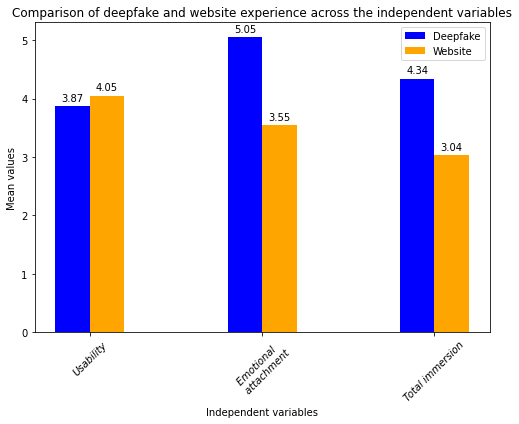

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Data
variables = ['Usability', 'Emotional \n attachment', 'Total immersion']
AR_averages = [3.87, 5.053333333333334, 4.3428571428571425]
Website_averages = [4.052083333333333, 3.5486111111111107, 3.035714285714286]

# Positioning the bars on the x-axis
x = np.arange(len(variables))  # Label locations
width = 0.20  # Width of the bars

fig, ax = plt.subplots(figsize=(7, 6))
rects1 = ax.bar(x - width/2, AR_averages, width, label='Deepfake', color='blue')
rects2 = ax.bar(x + width/2, Website_averages, width, label='Website', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Independent variables')
ax.set_ylabel('Mean values')
ax.set_title('Comparison of deepfake and website experience across the independent variables')
ax.set_xticks(x)
ax.set_xticklabels(variables, fontdict={'fontstyle': 'italic'}, rotation=45)
ax.set_xticklabels(variables)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
# import seaborn as sns

# Load your data
df = pd.read_excel("SurveyResults.xlsx")
group_AR = df[df['GroupCode'] == 'AR']['AverageUsability']
group_AR_q = df[df['GroupCode'] == 'AR']['Q1.6']
group_Website = df[df['GroupCode'] == 'WEBSITE']

# Convert AgeGroup to a categorical variable if it's not already
group_AR_q = group_AR_q.astype('category')

# Ensure Immersion is a numerical variable
group_AR  = pd.to_numeric(group_AR, errors='coerce')

# Check the data types to confirm
print(df.dtypes)

# Prepare the data for ANOVA
groups = group_AR_q.unique()
grouped_data = [group_AR[group_AR_q == group] for group in groups]

# # Perform the one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)
print('ANOVA for AgeGroup:')
print(f'F-statistic: {f_stat}, p-value: {p_value}')

# # QQ plot for normality
# residuals = df['AverageTotalImmersion'] - df.groupby('Q1.1')['Q1.1'].transform('mean')
# stats.probplot(residuals, dist="norm", plot=plt)
# plt.title('QQ Plot for AgeGroup Residuals')
# plt.show()

# # # Boxplot for homogeneity of variances
# # sns.boxplot(x='AgeGroup', y='Immersion', data=df)
# # plt.title('Boxplot of Immersion by AgeGroup')
# # plt.show()

# # Levene's test for homogeneity of variances
# w, pvalue = stats.levene(*grouped_data)
# print('Levene’s test for homogeneity of variances:')
# print(f'W = {w}, p-value = {pvalue}')


StartDate                     datetime64[ns]
EndDate                       datetime64[ns]
Status                                 int64
IPAddress                             object
Progress                               int64
Duration (in seconds)                  int64
Finished                               int64
RecordedDate                  datetime64[ns]
ResponseId                            object
RecipientLastName                    float64
RecipientFirstName                   float64
RecipientEmail                       float64
ExternalReference                    float64
LocationLatitude                     float64
LocationLongitude                    float64
DistributionChannel                   object
UserLanguage                          object
GroupCode                             object
Q1.1                                   int64
Q1.2                                   int64
Q1.3                                   int64
Q1.4                                   int64
Q1.5      